In [1]:
! pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
print(sklearn.__version__)


1.5.1


In [4]:
from sklearn.metrics import recall_score


In [5]:
from sklearn.metrics import confusion_matrix


In [6]:
! pip show scikit-learn


Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\HP\AppData\Roaming\Python\Python311\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, mlflow, mlxtend, scikit-learn-intelex, shap, Thyroid-Disease-Detection


In [7]:
pd.read_csv(r"c:\Users\HP\Downloads\Credit_Card_2 (1).csv")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [8]:
# Initialise SMOTE object
smote = SMOTE()

In [9]:
df=pd.read_csv(r"c:\Users\HP\Downloads\Credit_Card_2 (1).csv")

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]
y = df['default']

In [12]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [13]:
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default'] = y_smote

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Axes: xlabel='default', ylabel='count'>

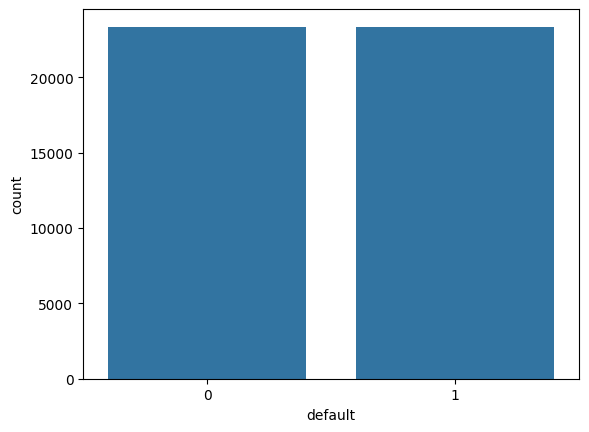

In [14]:
sns.countplot(x='default',  data= df_final)

In [15]:

df_final.default.value_counts()

default
1    23364
0    23364
Name: count, dtype: int64

In [16]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:

df_final.shape

(46728, 25)

In [19]:
# Encoding categorical variables
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'])

df_final.head()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,default,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,True,False,False,False,False,True,True,False,False
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,True,False,False,False,False,True,False,False,True
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,True,False,False,False,False,True,False,False,True
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,True,False,False,False,False,True,True,False,False
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,False,True,False,False,False,True,True,False,False


In [20]:

# We drop the column ID as it is of not use for our modeling
df_final.drop('ID',axis = 1, inplace = True)

In [21]:
df_final.shape

(46728, 30)

In [22]:
# Rearrange columns in dataframe before submitting for modeling
df_final = df_final[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL',
                     'PAY_MAY',
                     'PAY_JUNE',
                     'PAY_JULY',
                     'PAY_AUG',
                     'PAY_SEPT',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'default']]
     

In [23]:

#df_model = df_final.sample(frac=0.10, random_state=100)
# Create a copy of df_final
df_model = df_final.copy()
df_model.head()

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,False,True,False,False,True,False,False,True,False,24,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,False,True,False,False,True,False,True,False,False,26,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,False,True,False,False,True,False,True,False,False,34,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,False,True,False,False,True,False,False,True,False,37,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,True,False,False,False,True,False,False,True,False,57,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [24]:

# Train Test split
X = df_model.drop(columns=['default'], axis=1)
y = df_model['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Initialise RandomForestClassifier object
rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [26]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [27]:

# Calculate recall scores on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

In [28]:

# Print the recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9992051846417217
The recall on test data is  0.8400118290699394


In [29]:
# Find feature importance scores
rf_clf.feature_importances_

array([0.01493272, 0.02279168, 0.01171211, 0.00961744, 0.00737697,
       0.00154455, 0.01575664, 0.01930851, 0.00092995, 0.05163918,
       0.05590883, 0.02097577, 0.0246911 , 0.03069747, 0.03003844,
       0.06342395, 0.06915945, 0.04235647, 0.04157897, 0.04278057,
       0.04365567, 0.04692848, 0.05593495, 0.04334456, 0.04046736,
       0.04215981, 0.04635561, 0.04773872, 0.05619404])

In [30]:
# Arrange features according to their scores in descending order
feature_scores = pd.Series(rf_clf.feature_importances_,
                           index=df_model.drop('default', axis=1).columns).sort_values(ascending=False)

In [32]:
import matplotlib.pyplot as plt

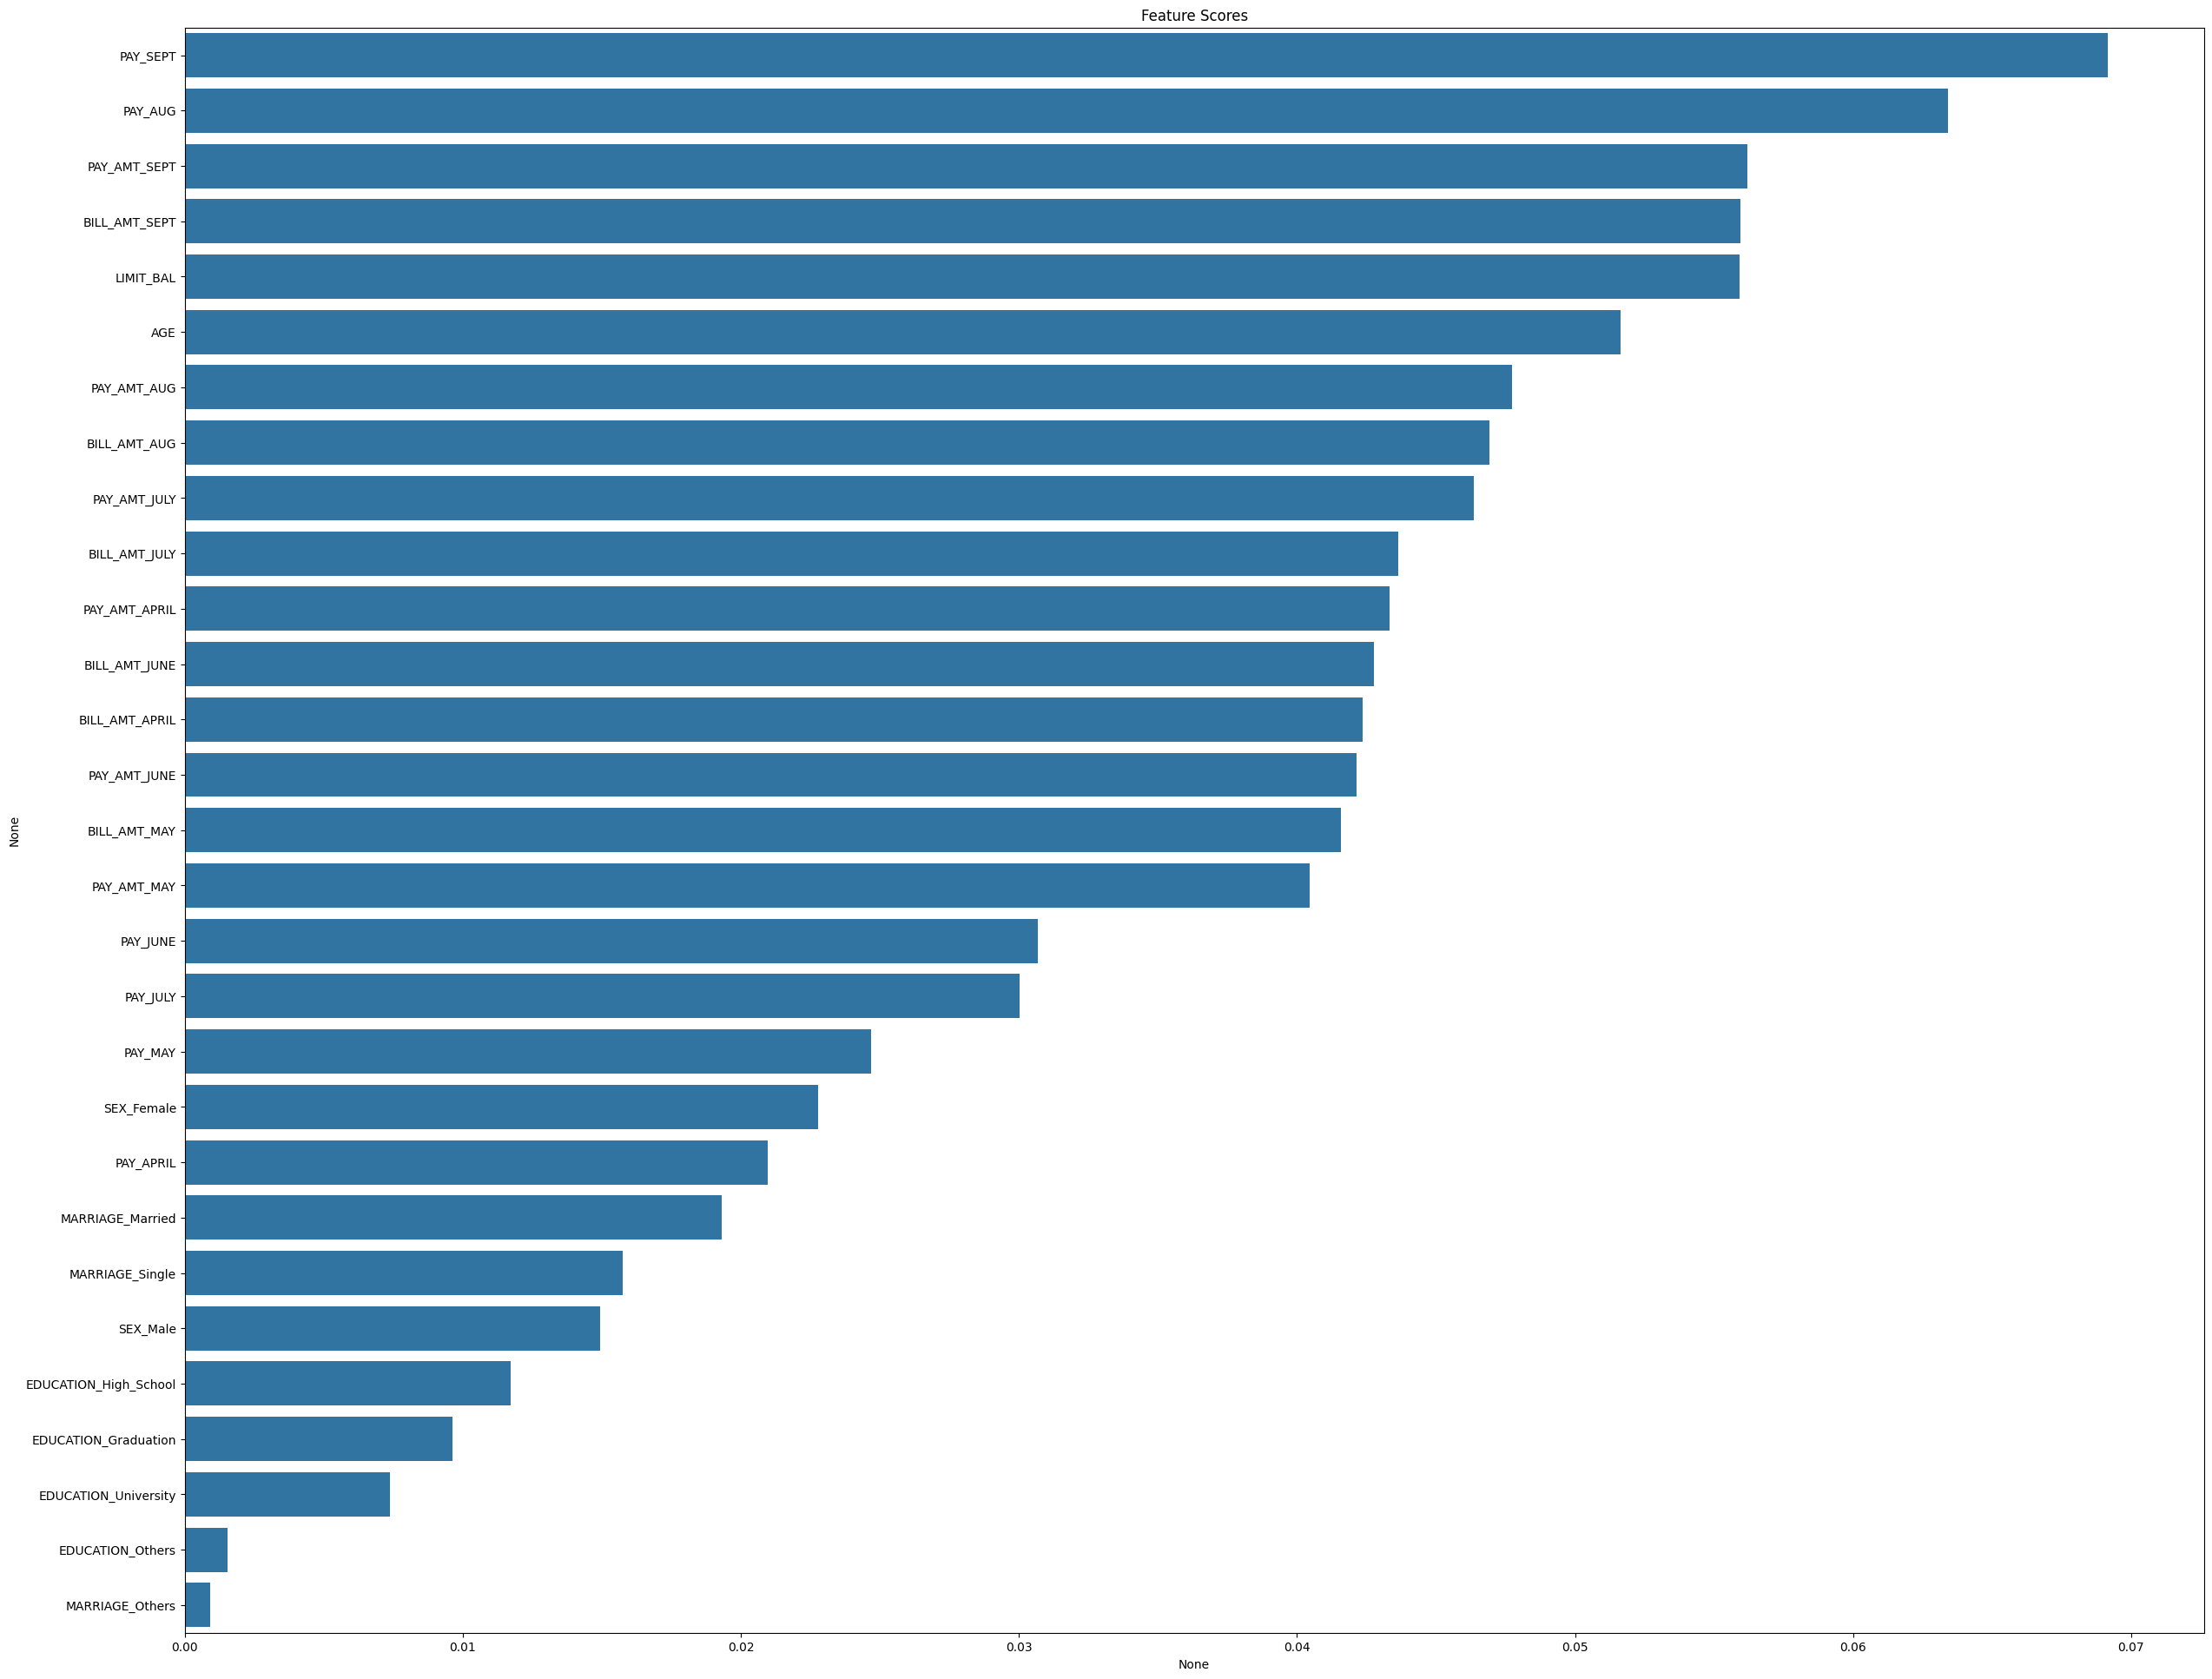

In [33]:
# Visualizing the scores
f, ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x=feature_scores,
                 y=feature_scores.index)
ax.set_title('Feature Scores')
ax.set_yticklabels(feature_scores.index)
plt.show()

In [34]:

# Create a dataframe from df_model using the top 15 features based on importance score
df_imp = df_model[feature_scores.index[:15]]
df_imp['default'] = df_model['default']
df_imp.head()

,PAY_SEPT,PAY_AUG,PAY_AMT_SEPT,BILL_AMT_SEPT,LIMIT_BAL,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,BILL_AMT_APRIL,PAY_AMT_JUNE,BILL_AMT_MAY,default
0,2,2,0.0,3913.0,20000.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1
1,-1,2,0.0,2682.0,120000.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,3261.0,1000.0,3455.0,1
2,0,0,1518.0,29239.0,90000.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,15549.0,1000.0,14948.0,0
3,0,0,2000.0,46990.0,50000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,29547.0,1100.0,28959.0,0
4,-1,0,2000.0,8617.0,50000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,19131.0,9000.0,19146.0,0


In [35]:
# Separate independent and dependent variables
X = df_imp.drop('default', axis=1)
y = df_imp['default']
     

In [38]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
#Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initiate RandomForestClassifier object
rf_clf_2 = RandomForestClassifier(random_state=6)
rf_clf_2.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [40]:
# Get the predicted classes
train_class_preds = rf_clf_2.predict(X_train)
test_class_preds = rf_clf_2.predict(X_test)


In [42]:
# Calculate recall scores
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

In [43]:
# Display recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9972192513368984
The recall on test data is  0.8622011727559765


In [44]:
# Create the new feature in the original dataframe
df_model['BILL_AMT_AVG'] = (df_model['BILL_AMT_APRIL'] + df_model['BILL_AMT_MAY'] + df_model['BILL_AMT_JUNE'] + df_model['BILL_AMT_JULY'] + df_model['BILL_AMT_AUG'] + df_model['BILL_AMT_SEPT'])/6
     

In [45]:
# Add the new feature to df_imp
df_imp['BILL_AMT_AVG'] = df_model['BILL_AMT_AVG']
df_imp.head()

,PAY_SEPT,PAY_AUG,PAY_AMT_SEPT,BILL_AMT_SEPT,LIMIT_BAL,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,BILL_AMT_APRIL,PAY_AMT_JUNE,BILL_AMT_MAY,default,BILL_AMT_AVG
0,2,2,0.0,3913.0,20000.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1,1284.000000
1,-1,2,0.0,2682.0,120000.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,3261.0,1000.0,3455.0,1,2846.166667
2,0,0,1518.0,29239.0,90000.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,15549.0,1000.0,14948.0,0,16942.166667
3,0,0,2000.0,46990.0,50000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,29547.0,1100.0,28959.0,0,38555.666667
4,-1,0,2000.0,8617.0,50000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,19131.0,9000.0,19146.0,0,18223.166667


In [46]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

In [48]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [49]:
# splitting data into train test split:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)


In [50]:
rf_clf_3=RandomForestClassifier(random_state=6)
rf_clf_3.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [51]:
train_class_preds=rf_clf_3.predict(X_train)
test_class_preds=rf_clf_3.predict(X_test)

In [52]:
train_recall_score_rf=(train_class_preds,y_train)
test_recall_score_rf=(test_class_preds,y_test)

In [62]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  (array([1, 1, 0, ..., 1, 0, 1], dtype=int64), 45038    1
14976    1
14304    0
35234    1
25941    0
        ..
11284    1
44732    1
38158    1
860      0
15795    1
Name: default, Length: 37382, dtype: int64)
The recall on test data is  (array([1, 1, 0, ..., 0, 0, 0], dtype=int64), 5466     1
32546    1
19306    0
39400    1
22996    0
        ..
17735    1
43773    1
15219    0
5183     0
14712    0
Name: default, Length: 9346, dtype: int64)


In [63]:
X[:1]

array([[ 1.64112459,  1.62693204, -0.33733905, -0.63040831, -1.06393599,
        -1.30155123, -0.21849352, -0.63811273, -0.28991076, -0.66408439,
        -0.28481031, -0.66776584, -0.64999072, -0.30401692, -0.65741023,
        -0.67771964]])

In [64]:

df_model['BILL_PAY_VALUE'] = ((df_model['PAY_AMT_SEPT']-df_model['BILL_AMT_AUG']) +
                       (df_model['PAY_AMT_AUG']-df_model['BILL_AMT_JULY']) +
                       (df_model['PAY_AMT_JULY']-df_model['BILL_AMT_JUNE']) +
                       (df_model['PAY_AMT_JUNE']-df_model['BILL_AMT_MAY']) +
                       (df_model['PAY_AMT_MAY']-df_model['BILL_AMT_APRIL']))/5

In [65]:

df_imp['BILL_PAY_VALUE'] = df_model['BILL_PAY_VALUE']
df_imp.head()

,PAY_SEPT,PAY_AUG,PAY_AMT_SEPT,BILL_AMT_SEPT,LIMIT_BAL,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,BILL_AMT_APRIL,PAY_AMT_JUNE,BILL_AMT_MAY,default,BILL_AMT_AVG,BILL_PAY_VALUE
0,2,2,0.0,3913.0,20000.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1,1284.000000,-620.4
1,-1,2,0.0,2682.0,120000.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,3261.0,1000.0,3455.0,1,2846.166667,-2279.0
2,0,0,1518.0,29239.0,90000.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,15549.0,1000.0,14948.0,0,16942.166667,-13279.2
3,0,0,2000.0,46990.0,50000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,29547.0,1100.0,28959.0,0,38555.666667,-35391.2
4,-1,0,2000.0,8617.0,50000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,19131.0,9000.0,19146.0,0,18223.166667,-8470.4


In [66]:
#df_imp.drop('BILL_AMT_AVG', axis=1, inplace=True)

In [67]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

In [68]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:

rf_clf_4 = RandomForestClassifier(random_state=6)
rf_clf_4.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [71]:
train_class_preds = rf_clf_4.predict(X_train)
test_class_preds = rf_clf_4.predict(X_test)

In [72]:
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

In [73]:

print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9973786979083079
The recall on test data is  0.8608074949810395


In [74]:
df_imp.drop('BILL_PAY_VALUE', axis=1, inplace=True)

We got the highest recall score using model rf_clf_3 with 0.867. Therefore, we shall save this model for production.

In [75]:
! pip install bz2file

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6889 sha256=b482a91505d8f3e5f7fffb1ebea89354ce3e6e85bc513e7160ba3c5fa51f6cd0
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\f8\dc\a2\d5648eee379349a57b03ccf386862f09826575087464f070b2
Successfully built bz2file


In [76]:
import bz2file as bz2

In [77]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)
     

In [78]:
compressed_pickle('ccdp', rf_clf_3)

We compressed a file and saved the Model.